# Problem statement
Nowadays, shopping malls and Big Marts keep track of individual item sales data in 
order to forecast future client demand and adjust inventory management. In a data 
warehouse, these data stores hold a significant amount of consumer information and 
particular item details. By mining the data store from the data warehouse, more 
anomalies and common patterns can be discovered.

# Data Description
    * Item_Identifier: Unique product ID
    * Item_Weight: Weight of product
    * Item_Fat_Content: Whether the product is low fat or not
    * Item_Visibility: The % of total display area of all products in a store allocated to the particular product.
    * Item_Type: The category to which the product belongs
    * Item_MRP: Maximum Retail Price (list price) of the product
    * Outlet_Identifier: Unique store ID
    * Outlet_Establishment_Year: The year in which store was established
    * Outlet_Size: The size of the store in terms of ground area covered
    * Outlet_Location_Type: The type of city in which the store is located
    * Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
    * Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# reading data, downloaded from https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data?select=Train.csv

df_train =  pd.read_csv('Train.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [5]:
for colmn in df_train.columns:
    if len(df_train[colmn].unique()) <= 25:
        print(f'{colmn} has these unique column values: {df_train[colmn].unique()}',end='\n')

Item_Fat_Content has these unique column values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type has these unique column values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier has these unique column values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year has these unique column values: [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size has these unique column values: ['Medium' nan 'High' 'Small']
Outlet_Location_Type has these unique column values: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type has these unique column values: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


## Observaations

1. Item_Identifier
    * It is the unique identifier for the item

2. Item_weight
    * Missing Values are present, needs Imputation of Missing Values

3. Item_fat_content
    * Non consumable products don't have any Fat content so need to make new category like no fat/NA etc
    * Seems 'Low fat', 'low fat' and 'LF' are same need to replace values similarly 'Regular' and 'reg' are same
4. Item_Visibility
    * Item visibiltiy=0 not possible so need to replace value with some other value
5. Item_Type
    * 16 Item Types are present need to group somthing like soft drink and hard drink etc into one
    * 'Household', 'Health and Hygiene', 'Others' should be one category
6. Item_MRP
    * Numerical column with no null values
7. Outlet_identifier
    * 10 outlets are there, we can rank outlet according to their sales and replace wih rank.
8. Outlet_Establishment_year
    * No missing values. can get age of the store with this.
9. Outlet _Size
    * Missing values are present, need to impute missing values.
10. Outlet_Location_Type
    * Categorical column with three distinct values
11. Outlet_type
    * Categorical column with four distinct values
12. Item_Outlet_Sales
    * Target column

In [6]:
numerical_columns,categorical_columns = [],[]
for colmn in df_train.columns:
    if df_train[colmn].dtypes != 'O':
        numerical_columns.append(colmn)
    else:
        categorical_columns.append(colmn)

In [7]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

### 1. item_identifier 

In [8]:
# item_identifier 
# first two characters of item identifier indicates special category of item
df_train['Item_Identifier'] = df_train['Item_Identifier'].apply(lambda x : x[:2])

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

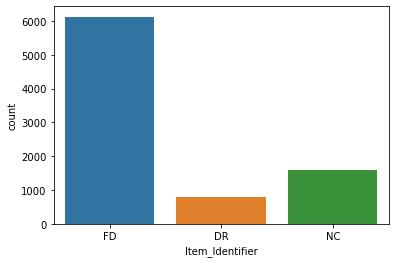

In [9]:
sns.countplot(df_train['Item_Identifier'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

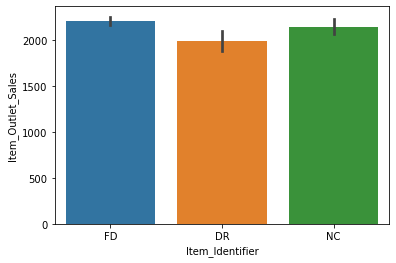

In [10]:
sns.barplot(x=df_train['Item_Identifier'],y=df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

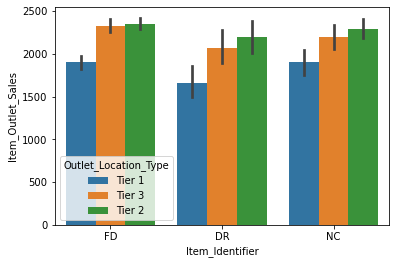

In [11]:
sns.barplot(x=df_train['Item_Identifier'],y=df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Location_Type'])

#### Conclusion
1. Count of all three categories is not equal but item sales amount seems equal.
2. Tier 2 and Tier 3 cities have more sales than Tier 1.
3. Here FD stands for Food, DR stands for Drink and NC stands for Non consumable.

### 2. Item_Weight 

In [12]:
# Item_weight 
df_train['Item_Weight'].isnull().sum()

1463

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

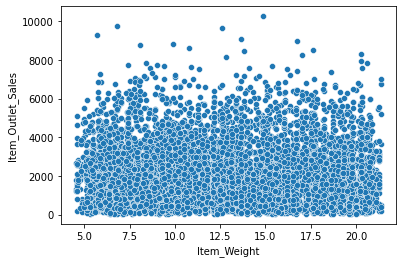

In [13]:
# Imputing Missing Values 
sns.scatterplot(x=df_train['Item_Weight'],y=df_train['Item_Outlet_Sales'])

In [14]:
from sklearn.impute import KNNImputer

In [15]:
data = df_train[['Item_Weight']]


imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
new_data = pd.DataFrame(data=new_array,columns=data.columns)

df_train['Item_Weight'] = new_data

In [16]:
# Making groups Low , Medium and high Just to verify
df_train['Item_Weight_category'] = pd.cut(df_train['Item_Weight'],bins=3,labels=['Low','Medium','High'])

<AxesSubplot:xlabel='Item_Weight_category', ylabel='count'>

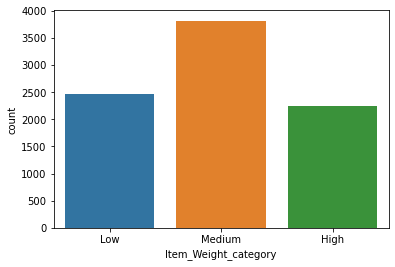

In [17]:
sns.countplot(df_train['Item_Weight_category'])

<AxesSubplot:xlabel='Item_Weight_category', ylabel='Item_Outlet_Sales'>

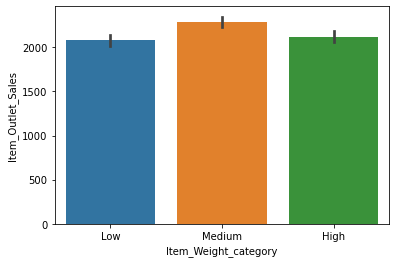

In [18]:
sns.barplot(x=df_train['Item_Weight_category'],y=df_train['Item_Outlet_Sales'])

#### Conclusion
1. We have missing values.
2. Items with medium weight are purchased more

### Item_fat_content

In [19]:
# Item_fat_content
# Replacing other same categories 
df_train['Item_Fat_Content'].unique()
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

In [20]:
# replacing non consumable fat content with other category 
df_train.loc[df_train['Item_Identifier']=='NC','Item_Fat_Content'] = 'Non Edible' 
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

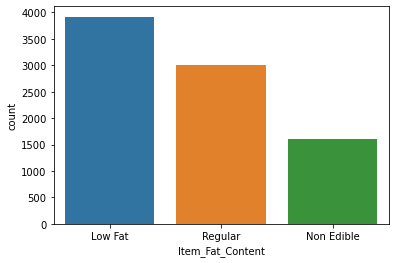

In [21]:
sns.countplot(df_train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

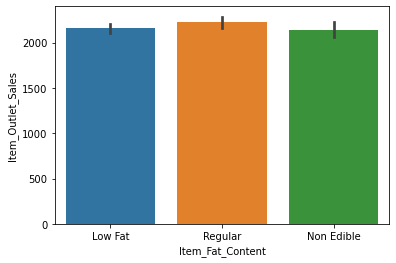

In [22]:
sns.barplot(x=df_train['Item_Fat_Content'],y=df_train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

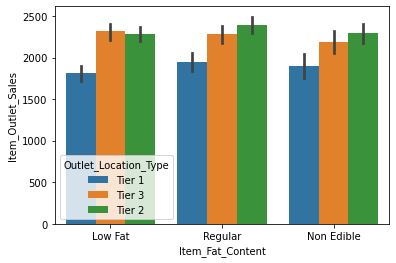

In [23]:
sns.barplot(x=df_train['Item_Fat_Content'],y=df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Location_Type'])

#### Conclusion
1. Most of the items are edible and Non edible items are costlier.
2. again tier 2 and tier 3 has more sales.
3. Items with low fat were purchased frequently though sales amount for all 3 categories are almost same.

### Item_Visibility

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

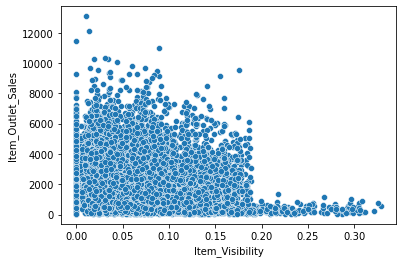

In [24]:
# Item Visibility 
sns.scatterplot(x=df_train['Item_Visibility'],y=df_train['Item_Outlet_Sales'])

In [25]:
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

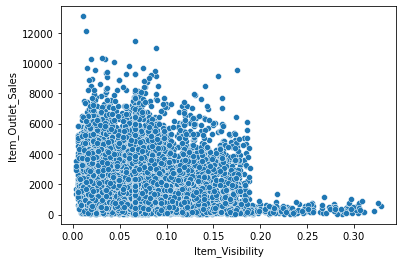

In [26]:
sns.scatterplot(x=df_train['Item_Visibility'],y=df_train['Item_Outlet_Sales'])

In [27]:
# Will make categories of two less visible and more visible 
df_train['Item_Visibility_range'] = pd.cut(df_train['Item_Visibility'],bins=2,labels=['Low','High'])

In [28]:
df_train[df_train['Item_Visibility_range']=='Low'].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8120.000000,8120.000000,8120.000000,8120.000000,8120.000000
mean,12.854130,0.063705,141.178302,1997.981281,2228.521975
std,4.249962,0.039003,62.339809,8.345486,1705.954951
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.300000,0.031945,93.845550,1987.000000,892.172000
50%,12.857645,0.058699,142.812800,1999.000000,1843.933100
75%,16.100000,0.087463,186.090450,2004.000000,3140.578600
max,21.350000,0.165838,266.888400,2009.000000,13086.964800


In [29]:
df_train[df_train['Item_Visibility_range']=='High'].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,12.928474,0.201346,137.254768,1994.821340,1229.595475
std,3.717309,0.039311,60.911287,8.342354,1415.587005
min,4.610000,0.166033,32.921600,1985.000000,35.287400
25%,10.997500,0.173581,93.076500,1985.000000,223.043000
50%,12.857645,0.184035,146.241800,1998.000000,588.567200
75%,15.100000,0.215860,177.321200,1999.000000,1855.917500
max,20.750000,0.328391,266.588400,2009.000000,9562.219600


#### Conclusion
1. first graph shows item with 0 visibilty has more sales but this is not possible as product should be somewhere in the store for display.



### Item_type

In [30]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [31]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
a = df_train[df_train['Item_Identifier'] == 'FD']
a['Item_Type'].unique()

array(['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods',
       'Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Breads',
       'Starchy Foods', 'Seafood'], dtype=object)

In [33]:
a = df_train[df_train['Item_Identifier'] == 'DR']
a['Item_Type'].unique()

array(['Soft Drinks', 'Hard Drinks', 'Dairy'], dtype=object)

In [34]:
a = df_train[df_train['Item_Identifier'] == 'NC']
a['Item_Type'].unique()

array(['Household', 'Health and Hygiene', 'Others'], dtype=object)

#### Conclusion
1. We have 16 unique item types but broadly these items can be categorised into three categories: Food,Drink and Non-Food which is already mentioned in Item_Identifier column. So we can drop this column.

In [35]:
df_train.drop(columns=['Item_Type'],inplace=True)

### Item_MRP

In [36]:
df_train['Item_MRP']

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

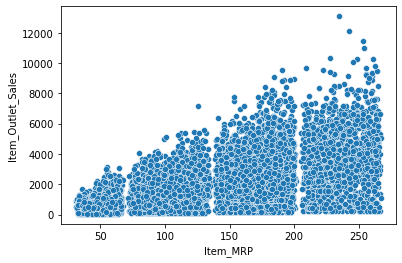

In [37]:
sns.scatterplot(x=df_train['Item_MRP'],y=df_train['Item_Outlet_Sales'])

### Outlet_Identifier

In [38]:
df_train['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

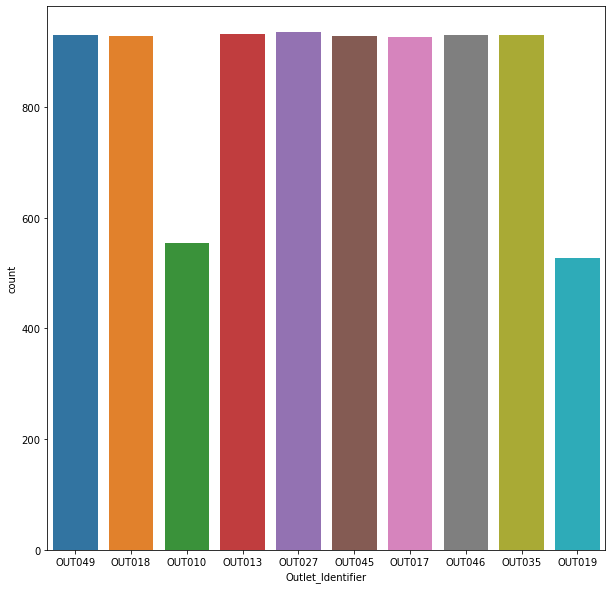

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(df_train['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

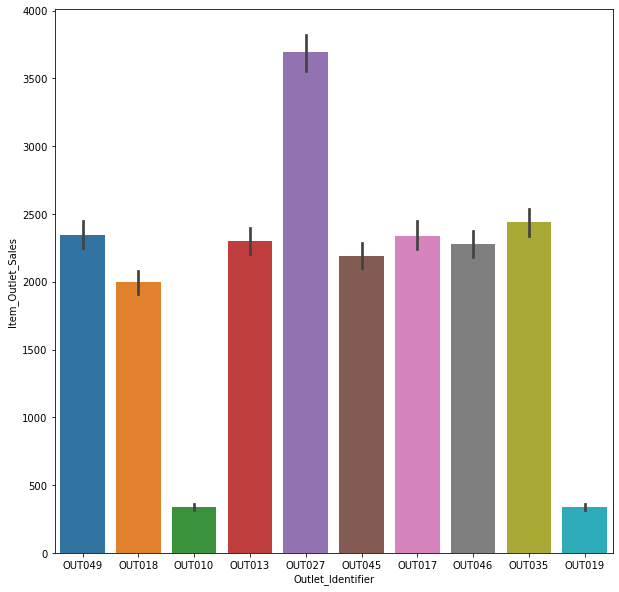

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_train['Outlet_Identifier'],y=df_train['Item_Outlet_Sales'])

1. OUT027 has more sales than others.
2. This column not contributing much so we can drop this column.

In [41]:
df_train.drop(columns=['Outlet_Identifier'],inplace=True)

## Outlet_Establishment_Year

In [42]:
df_train['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda x : 2013 - x) # because we have data till 2013
df_train.drop(columns=['Outlet_Establishment_Year'],inplace=True)

<AxesSubplot:xlabel='Outlet_Age', ylabel='count'>

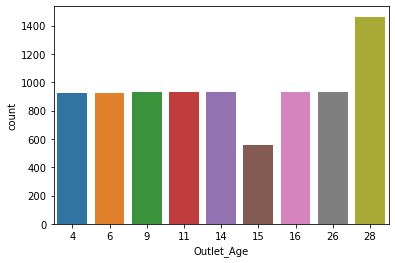

In [43]:
sns.countplot('Outlet_Age',data=df_train)

<AxesSubplot:xlabel='Outlet_Age', ylabel='Item_Outlet_Sales'>

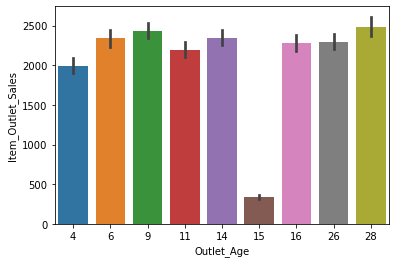

In [44]:
sns.barplot(x=df_train['Outlet_Age'],y=df_train['Item_Outlet_Sales'])

### Outlet_Size

In [45]:
# It is a categorical column so we will do mode imputation
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [46]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

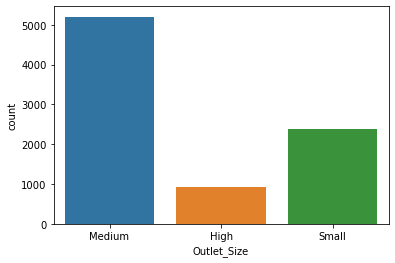

In [47]:
sns.countplot(df_train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

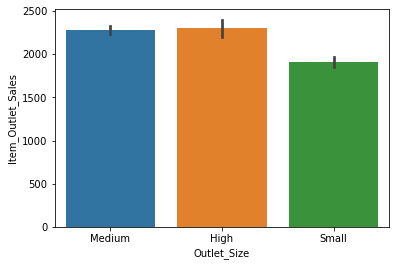

In [48]:
sns.barplot(x=df_train['Outlet_Size'],y=df_train['Item_Outlet_Sales'])

### Outlet_location_type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

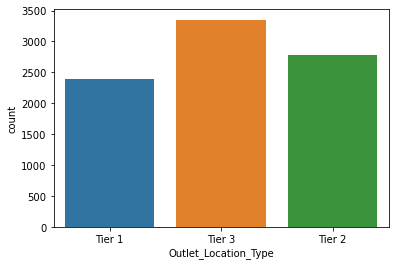

In [49]:
sns.countplot('Outlet_Location_Type',data=df_train)

### Outlet_Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

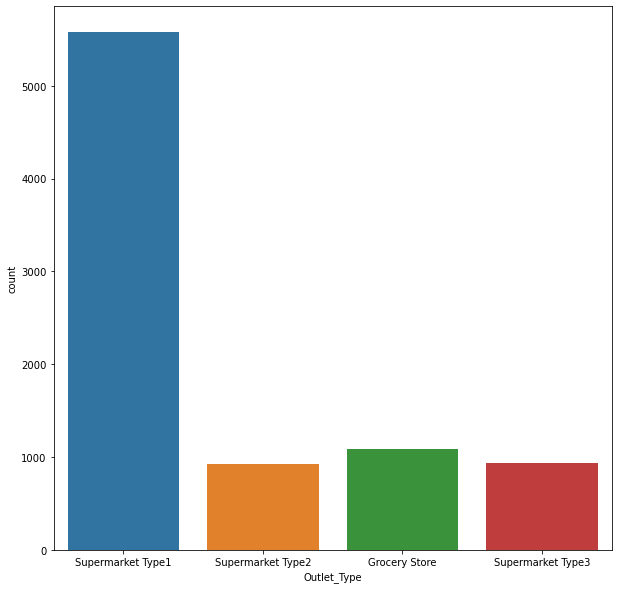

In [50]:
plt.figure(figsize=(10,10))
sns.countplot('Outlet_Type',data=df_train)

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Item_Identifier        8523 non-null   object  
 1   Item_Weight            8523 non-null   float64 
 2   Item_Fat_Content       8523 non-null   object  
 3   Item_Visibility        8523 non-null   float64 
 4   Item_MRP               8523 non-null   float64 
 5   Outlet_Size            8523 non-null   object  
 6   Outlet_Location_Type   8523 non-null   object  
 7   Outlet_Type            8523 non-null   object  
 8   Item_Outlet_Sales      8523 non-null   float64 
 9   Item_Weight_category   8523 non-null   category
 10  Item_Visibility_range  8523 non-null   category
 11  Outlet_Age             8523 non-null   int64   
dtypes: category(2), float64(4), int64(1), object(5)
memory usage: 682.9+ KB


In [52]:
numerical_columns,categorical_columns = [],[]
for colmn in df_train.columns:
    if df_train[colmn].dtypes != 'O':
        numerical_columns.append(colmn)
    else:
        categorical_columns.append(colmn)

In [53]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Item_Weight_category',
 'Item_Visibility_range',
 'Outlet_Age']

In [54]:
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<AxesSubplot:>

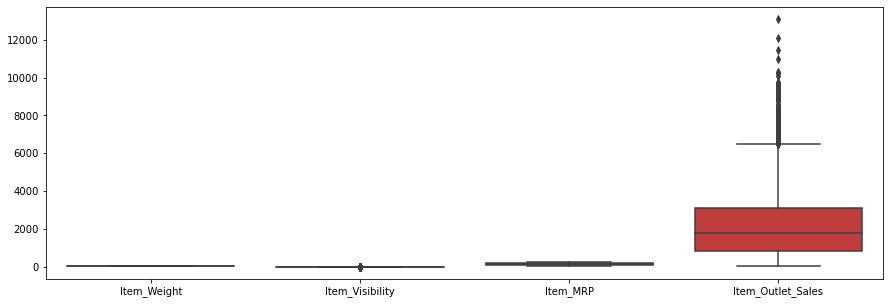

In [55]:
### Outlier detection
plt.figure(figsize=(15,5))
sns.boxplot(data=df_train[numerical_columns[:-1]])

#### No Outliers detected

### Correlations

<AxesSubplot:>

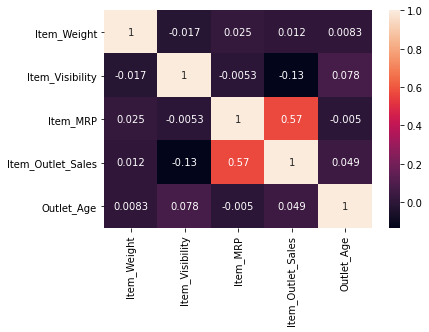

In [56]:
sns.heatmap(df_train[numerical_columns].corr(), annot=True)

## Feature Engineering

In [57]:
X = df_train.drop(columns=['Item_Outlet_Sales'])
y = df_train['Item_Outlet_Sales']

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Item_Identifier        8523 non-null   object  
 1   Item_Weight            8523 non-null   float64 
 2   Item_Fat_Content       8523 non-null   object  
 3   Item_Visibility        8523 non-null   float64 
 4   Item_MRP               8523 non-null   float64 
 5   Outlet_Size            8523 non-null   object  
 6   Outlet_Location_Type   8523 non-null   object  
 7   Outlet_Type            8523 non-null   object  
 8   Item_Weight_category   8523 non-null   category
 9   Item_Visibility_range  8523 non-null   category
 10  Outlet_Age             8523 non-null   int64   
dtypes: category(2), float64(3), int64(1), object(5)
memory usage: 616.3+ KB


In [59]:
## Categorical feature encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

## Model Building

In [61]:
def encoding(dataframe):
        # Changing Values of item Identifier because sales of item identifier are more so giving high value
        Item_Identifier = {'DR': 1, 'FD': 3, 'NC': 2}
        # Changing Values of Item_Fat_Content because sales of Regular are more so giving high value
        Item_Fat_Content = {'Low Fat': 1, 'Non Edible': 0, 'Regular': 2}
        # Changing Values of outlet size because sales in medium size outlets are more so giving high value
        Outlet_Size = {'High': 2, 'Medium': 3, 'Small': 1, np.nan: 0} 
        Outlet_Location_Type = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
        Outlet_Type = {'Grocery Store': 0,'Supermarket Type1': 2,'Supermarket Type2': 1,'Supermarket Type3': 3}
        for i in dataframe.columns:
            if i == "Item_Identifier":
                dataframe[i] = dataframe[i].map(Item_Identifier)
            elif i =="Item_Fat_Content":
                dataframe[i] = dataframe[i].map(Item_Fat_Content)
            elif i =="Outlet_Size":
                dataframe[i] = dataframe[i].map(Outlet_Size)
            elif i =="Outlet_Location_Type":
                dataframe[i] = dataframe[i].map(Outlet_Location_Type)
            elif i =="Outlet_Type":
                dataframe[i] = dataframe[i].map(Outlet_Type)
            else: 
                print("Not Able to Encode")
        
        return dataframe

In [62]:
X = encoding(X)

Not Able to Encode
Not Able to Encode
Not Able to Encode
Not Able to Encode
Not Able to Encode
Not Able to Encode


In [63]:
X['Item_Weight_category'] = X['Item_Weight_category'].map({'Medium':1, 'High':2, 'Low':0})
X['Item_Weight_category'] = X.astype({'Item_Weight_category':'int64'})

In [64]:
X['Item_Visibility_range'] = X['Item_Visibility_range'].map({ 'High':1, 'Low':0})
X['Item_Visibility_range'] = X.astype({'Item_Visibility_range':'int64'})

In [65]:
# Train Test Split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [66]:
print(f'Shape of data:{X.shape}')
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')

Shape of data:(8523, 11)
Shape of X_train:(6818, 11)
Shape of y_train:(6818,)
Shape of X_test:(1705, 11)
Shape of y_test:(1705,)


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [68]:
# LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {R2}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE {np.round(rmse,2)}')

accuracy 0.5316432753331273
RMSE 1203.07


In [69]:
# Checking for Random Forest
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

R2 = r2_score(y_test,y_pred)
print(f'accuracy {np.round(R2,2)}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE {np.round(rmse,2)}')

accuracy 0.53
RMSE 1208.87
